In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity

plt.ion()
plt.show()

def raw_data(path):
  data = pd.read_csv(path)
  return data.values

def truePDF(data, mu, cov, per):
    true_pdf = 0
    for i in range(len(mu)):
        true_pdf += (per[i] * multivariate_normal(mu[i], cov[i]).pdf(data))
    return true_pdf


In [2]:
import math

def gaussian(u, sigma):
   #   if  np.abs(u) <=  np.abs(1/2):
      return (1/(math.sqrt(2*math.pi) * sigma)) * math.exp(-(u**2)/(2*sigma**2))
   #   else:
      #   return 0


In [3]:
def kernel(kernelFunction, dataPoint, x, h, sigma):
    dim = len(dataPoint)
    prod = 1
    for j in range(0, dim):
        prod *= kernelFunction((x[j]-dataPoint[j])/h, sigma)
    return prod


def KDE(data_2d, h,X_2d, sigma, kernel_type='gaussian'):
    N = np.size(X_2d, 0)
    d = np.size(data_2d, 1)  
    probs = []  

    if kernel_type == 'parzen':
        K = parzenWindowd
    elif kernel_type == 'gaussian':
        K = gaussian

    for x in X_2d:
        px = 1/N * 1/(h**d) * np.sum([kernel(K, dataPoint, x, h, sigma) for dataPoint in data_2d])
        probs.append(px) 

    return probs

In [92]:
import math

def getDistance(dataPoint, x, k):
    distances = np.array([np.linalg.norm(i-x) for i in dataPoint])
    return np.sort(distances)[k-1]


def KNN(data_2d, k,X_2d):
    N = np.size(data_2d, 1)  
    probs = []  

    for x in X_2d:
        v = math.pi * (getDistance(data_2d,x,k)**2)
        if v == 0:
            probs.append(1)
        else:
            px = k/(N * v)
            probs.append(px)  

    return probs

In [5]:
data_2s = raw_data('dataset.csv')
data_2d = data_2s[:,:-1]
print("2D Data: \n", data_2d.shape)


2D Data: 
 (1500, 2)


In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Hs = [0.3,0.6,0.9]
sigmas = [0.2,0.6]
Ks = [1,10,99]

In [80]:
mu = np.array([[2, 5],
               [8, 1],
               [5, 3]])
cov = np.array([[[2, 0], [0, 2]],
                  [[3, 1], [1, 3]],
                  [[2, 1], [1, 2]]])
per = [1/3,1/3,1/3]

# generate sample
x = np.linspace(np.amin(data_2d[:, 0]), np.amax(
    data_2d[:, 0]), 50).reshape(-1, 1)
y = np.linspace(np.amin(data_2d[:, 1]), np.amax(
    data_2d[:, 1]), 50).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
X_2d = np.concatenate(
    [xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
print(X_2d.shape)

true_pdf = truePDF(X_2d,mu, cov, per)
zz = np.array(true_pdf).reshape(xx.shape)


(2500, 2)


In [81]:
gaussianZZs = []
for h in Hs:
    print("h: ",h)
    for sigma in sigmas:
        print("sigma: ",sigma)
        probs = KDE(data_2d, h, X_2d, sigma, 'gaussian')
        result = np.array(probs).reshape(xx.shape)
        gaussianZZs.append(result)

print("End Gaussian KDE")


h:  0.3
sigma:  0.2
sigma:  0.6
h:  0.6
sigma:  0.2
sigma:  0.6
h:  0.9
sigma:  0.2
sigma:  0.6
End Gaussian KDE


In [94]:
probability = []
for k in Ks:
    print("k: ",k)
    probs = KNN(data_2d, k,X_2d)
    result = np.array(probs).reshape(xx.shape)
    probability.append(result)

print("End KNN")

k:  1
k:  10
k:  99
End KNN


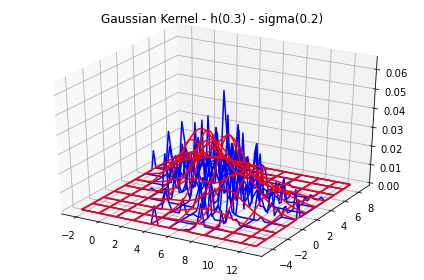

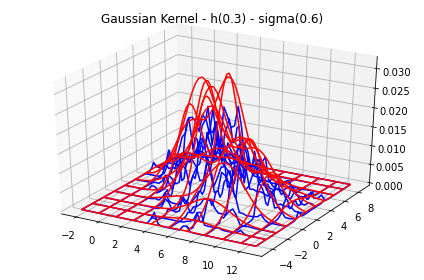

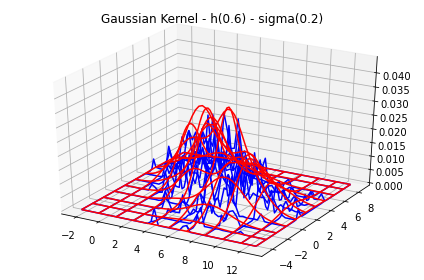

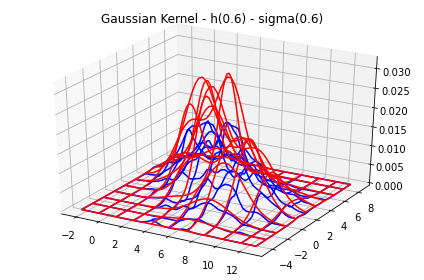

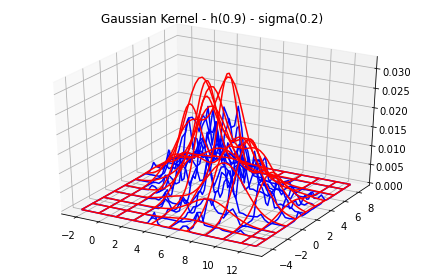

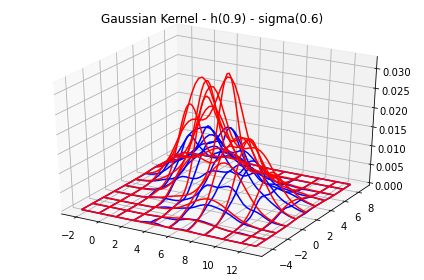

In [83]:
# plot surface plots of KDE
j = -1

for i in range(len(gaussianZZs)):
    if i % len(sigmas) == 0:
        j = j + 1
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_wireframe(xx, yy, zz, color='r', rstride=5, cstride=5)
    ax.plot_wireframe(xx, yy, gaussianZZs[i], color='b', rstride=5, cstride=5)
    ax.set_title('Gaussian Kernel - h('+str(Hs[j])+') - sigma('+str(sigmas[i%len(sigmas)])+')')
    fig.tight_layout()

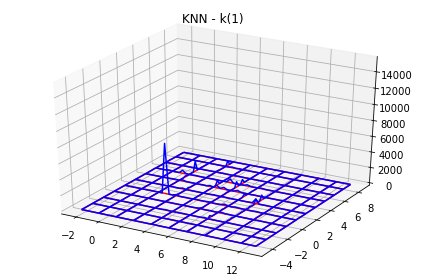

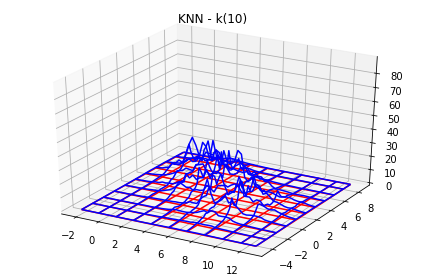

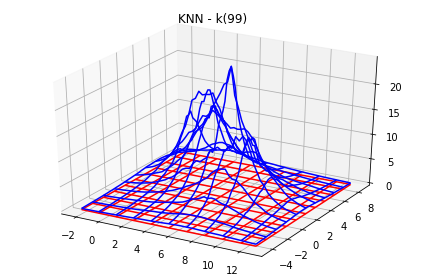

In [95]:
for i in range(len(Ks)):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_wireframe(xx, yy, zz, color='r', rstride=5, cstride=5)
    ax.plot_wireframe(xx, yy, probability[i], color='b', rstride=5, cstride=5)
    ax.set_title('KNN - k('+str(Ks[i])+')')
    fig.tight_layout()